## Trabalho 1: Aprendizado de Máquina
### Modelo de aprendizado supervisionado escolhodo
Alunos: 

Fernando Zagatti RA: 11415770

Theodosio Banevicius RA: 619825

Otavio Cesar Toma da Silva RA: 726576

Maiser Jose Alves Oliva RA: 327042

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
dataset = pd.read_csv('winequalityN.csv') #Importando o dataset

In [2]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
dataset.describe()    #Descreve o dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
dataset.isnull().sum()   #Verifica valores faltantes (nulos)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
transform = {"type": {"white": 1, "red": 2}}    #Transforma as strings da coluna type em números
dataset.replace(transform, inplace=True)
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
dataset.dropna(inplace=True)   #Exclui valores nulos
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
dataset.info()           #Mostra o que tem em cada coluna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
type                    6463 non-null int64
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


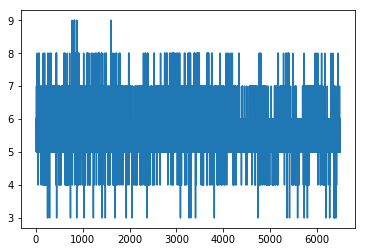

In [10]:
dataset['quality'].plot()  #Plotando gráfico para verificar quantidade dos atributos target. Maioria está entre 5 - 7.

In [11]:
x_t_treino, x_t_teste, y_t_treino, y_t_teste = train_test_split(dataset.drop(['quality'], axis=1), dataset['quality'], test_size=0.3, random_state=42)

#Random Forest Classifier
model = RandomForestClassifier(n_estimators = 300, max_depth = 20, random_state=0)
model.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste:: {:.0f}%".format(model.score(x_t_teste,y_t_teste.ravel()) * 100))
print('')

Score do teste:: 67%



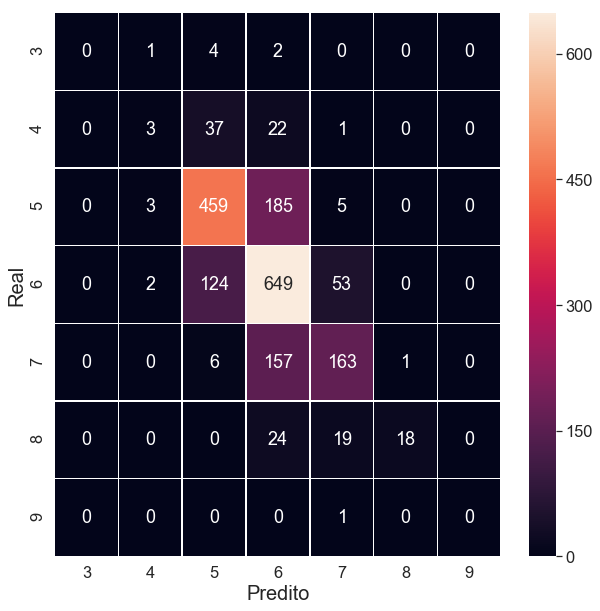

In [12]:
y = np.array(dataset[['quality']])
x = np.array(dataset.drop(['quality'], axis=1))

#Criando a matriz de confusão.
y_t_pred = model.predict(x_t_teste)

cm = confusion_matrix(y_t_teste, y_t_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True, linewidths=.5, linecolor='white', fmt='g')
plt.xlabel('Predito', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.show()

In [13]:
x_t_treino, x_t_teste, y_t_treino, y_t_teste = train_test_split(dataset.drop(['quality'], axis=1), dataset['quality'], test_size=0.3, random_state=42)

#Random Forest Classifier
model = RandomForestClassifier(n_estimators = 1500, max_depth = 20, random_state=0)
model.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste:: {:.0f}%".format(model.score(x_t_teste,y_t_teste.ravel()) * 100))
print('')

Score do teste:: 67%



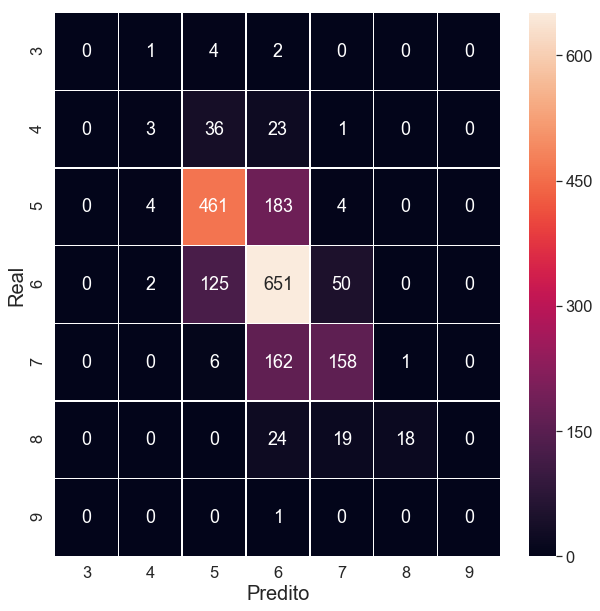

In [14]:
y = np.array(dataset[['quality']])
x = np.array(dataset.drop(['quality'], axis=1))

#Criando a matriz de confusão.
y_t_pred = model.predict(x_t_teste)

cm = confusion_matrix(y_t_teste, y_t_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True, linewidths=.5, linecolor='white', fmt='g')
plt.xlabel('Predito', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.show()